<a href="https://www.kaggle.com/code/ravaghi/s05e04-podcast-listening-time-autogluon?scriptVersionId=232226185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports and configs

In [1]:
!pip install -q scikit-learn==1.5.2 autogluon.tabular==1.2 ray==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.1 MB/s eta 0:00:00


In [2]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import joblib
import os

warnings.filterwarnings("ignore")

In [3]:
class CFG:
    train_path = "/kaggle/input/playground-series-s5e4/train.csv"
    test_path = "/kaggle/input/playground-series-s5e4/test.csv"
    sample_sub_path = "/kaggle/input/playground-series-s5e4/sample_submission.csv"
    
    target = "Listening_Time_minutes"
    n_folds = 5
    seed = 42
    time_limit = 3600 * 11

# Loading data and predefining folds

In [4]:
train = pd.read_csv(CFG.train_path, index_col="id")
test = pd.read_csv(CFG.test_path, index_col="id")

In [5]:
kf = KFold(n_splits=CFG.n_folds, random_state=CFG.seed, shuffle=True)
split = kf.split(train, train[CFG.target])
for i, (_, val_index) in enumerate(split):
    train.loc[val_index, "fold"] = i

# Fitting the predictor

In [6]:
predictor = TabularPredictor(
    path="/MrAutogluonModels",
    problem_type="regression",
    eval_metric="rmse",
    label=CFG.target,
    groups="fold",
    verbosity=2
)

In [7]:
predictor.fit(
    train_data=train,
    time_limit=CFG.time_limit,
    presets="best_quality",
    excluded_model_types=["KNN"]
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       30.04 GB / 31.35 GB (95.8%)
Disk Space Avail:   1892.04 GB / 8062.39 GB (23.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stac

(_ray_fit pid=426) [1000]	valid_set's rmse: 13.0507
(_ray_fit pid=428) [2000]	valid_set's rmse: 13.0216 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=427) [3000]	valid_set's rmse: 13.0379 [repeated 4x across cluster]
(_ray_fit pid=427) [4000]	valid_set's rmse: 13.0437 [repeated 3x across cluster]
(_ray_fit pid=425) [4000]	valid_set's rmse: 12.9378
(_ray_fit pid=539) [1000]	valid_set's rmse: 13.0041
(_ray_fit pid=539) [2000]	valid_set's rmse: 12.9887


(_dystack pid=158) 	-13.0098	 = Validation score   (-root_mean_squared_error)
(_dystack pid=158) 	257.86s	 = Training   runtime
(_dystack pid=158) 	199.11s	 = Validation runtime
(_dystack pid=158) Fitting model: LightGBM_BAG_L1 ... Training model for up to 6307.21s of the 9606.31s of remaining time.
(_dystack pid=158) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.66%)


(_ray_fit pid=659) [1000]	valid_set's rmse: 13.0209
(_ray_fit pid=659) [2000]	valid_set's rmse: 13.0009 [repeated 4x across cluster]
(_ray_fit pid=658) [3000]	valid_set's rmse: 12.9911 [repeated 4x across cluster]
(_ray_fit pid=657) [4000]	valid_set's rmse: 12.9062 [repeated 2x across cluster]
(_ray_fit pid=773) [2000]	valid_set's rmse: 12.9534 [repeated 2x across cluster]
(_ray_fit pid=773) [3000]	valid_set's rmse: 12.9572


(_dystack pid=158) 	-12.9755	 = Validation score   (-root_mean_squared_error)
(_dystack pid=158) 	218.46s	 = Training   runtime
(_dystack pid=158) 	133.54s	 = Validation runtime
(_dystack pid=158) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 6059.21s of the 9358.30s of remaining time.
(_dystack pid=158) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=158) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=1.57%)
(_dystack pid=158) 	-12.8513	 = Validation score   (-root_mean_squared_error)
(_dystack pid=158) 	1582.09s	 = Training   runtime
(_dystack pid=158) 	37.94s	 = Validation runtime
(_dystack pid=158) Fitting model: CatBoost_BAG_L1 ... Training model for up to 4470.70s of the 7769.79s of remaining time.
(_dystack pid=158) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.68%)
(_ray_f

In [8]:
predictor.leaderboard(silent=True).style.background_gradient(subset=["score_val"], cmap="RdYlGn")

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-12.678114,root_mean_squared_error,849.255194,28610.114207,0.011188,1.799570,3,True,19
1,CatBoost_BAG_L2,-12.690512,root_mean_squared_error,775.911550,21415.207384,4.921530,1876.719921,2,True,14
2,ExtraTreesMSE_BAG_L2,-12.702085,root_mean_squared_error,806.267136,20729.164584,35.277116,1190.677122,2,True,15
3,LightGBM_BAG_L2,-12.711874,root_mean_squared_error,778.860387,19580.049518,7.870367,41.562056,2,True,12
4,NeuralNetFastAI_BAG_L2,-12.714453,root_mean_squared_error,779.758712,20204.383639,8.768692,665.896176,2,True,16
5,LightGBMXT_BAG_L2,-12.744252,root_mean_squared_error,796.269313,19621.703901,25.279293,83.216438,2,True,11
6,WeightedEnsemble_L2,-12.753260,root_mean_squared_error,644.651571,2572.132664,0.011600,0.943574,2,True,10
7,RandomForestMSE_BAG_L2,-12.766027,root_mean_squared_error,800.276669,24875.021418,29.286649,5336.533956,2,True,13
8,RandomForestMSE_BAG_L1,-12.824315,root_mean_squared_error,37.148098,1758.141019,37.148098,1758.141019,1,True,3
9,NeuralNetTorch_BAG_L2,-12.917471,root_mean_squared_error,780.013435,19604.419870,9.023415,65.932407,2,True,18


# Visualizing the ensemble weights

In [9]:
def get_ensemble_weights(predictor):
    info = predictor.info()
    ensemble_weights = {}
    for model_name, values in info["model_info"].items():
        if "Ensemble" in model_name:
            children_info = values["children_info"]
            ensemble_weights[model_name] = values["children_info"][list(children_info.keys())[0]]["model_weights"]
    return ensemble_weights

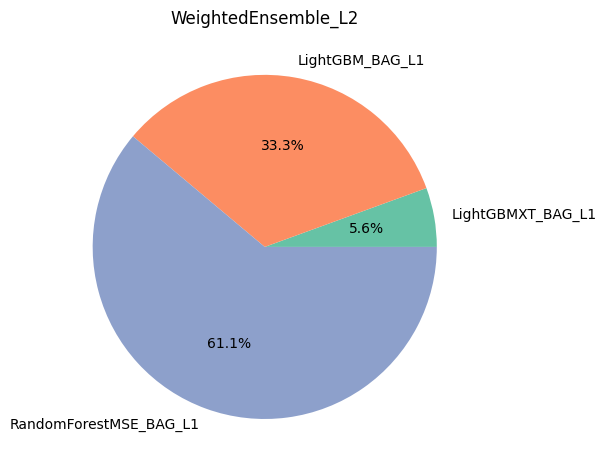

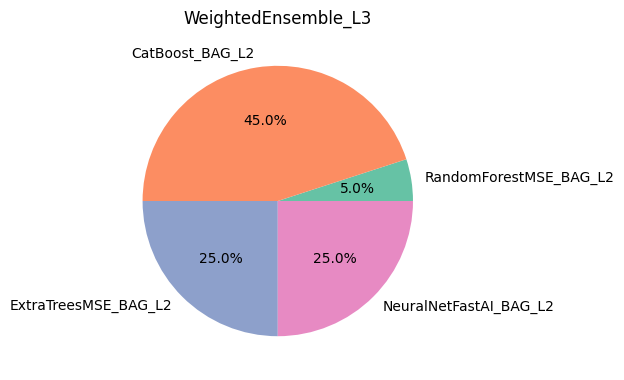

In [10]:
ensemble_weights = get_ensemble_weights(predictor)

for key, value in ensemble_weights.items():
    plt.figure(figsize=(6, 6))
    plt.pie(value.values(), labels=value.keys(), autopct="%1.1f%%", colors=sns.color_palette("Set2", len(value)))
    plt.title(key)
    plt.tight_layout()
    plt.show()

# Collecting and saving OOF files

In [11]:
def save_preds(preds, cv_score, name, type, is_ensemble):
    base_path = "oof_preds" if type == "oof" else "test_preds"
    base_path = "." if is_ensemble else base_path
    joblib.dump(preds, f"{base_path}/{name}_{type}_preds_{cv_score:.6f}.pkl")

def save_submission(test_preds, score):
    sub = pd.read_csv(CFG.sample_sub_path)
    sub[CFG.target] = test_preds
    sub.to_csv(f"sub_autogluon_{score:.6f}.csv", index=False)
    
os.makedirs("oof_preds", exist_ok=True)
os.makedirs("test_preds", exist_ok=True)

In [12]:
oof_preds = {}
test_preds = {}

In [13]:
best_model = predictor.model_best
_test_preds = predictor.predict_multi(test)
for model in predictor.model_names():
    model_oof_preds = predictor.predict_oof(model).values
    model_test_preds = _test_preds[model].values
    
    cv_score = root_mean_squared_error(train[CFG.target], model_oof_preds)
    if model != best_model:
        save_preds(model_oof_preds, cv_score, model, "oof", False)
        save_preds(model_test_preds, cv_score, model, "test", False)
    else:
        save_preds(model_oof_preds, cv_score, model, "oof", True)
        save_preds(model_test_preds, cv_score, model, "test", True)
        save_submission(model_test_preds, cv_score)
        
    oof_preds[model] = model_oof_preds
    test_preds[model] = model_test_preds

# Visualizing the results

In [14]:
scores = {}
split = KFold(n_splits=CFG.n_folds, shuffle=False).split(train, train[CFG.target])
for fold_idx, (train_index, val_index) in enumerate(split):
    for model in predictor.model_names():
        fold_score = root_mean_squared_error(train.loc[val_index, CFG.target], oof_preds[model][val_index])
        if model not in scores:
            scores[model] = []
        scores[model].append(fold_score)

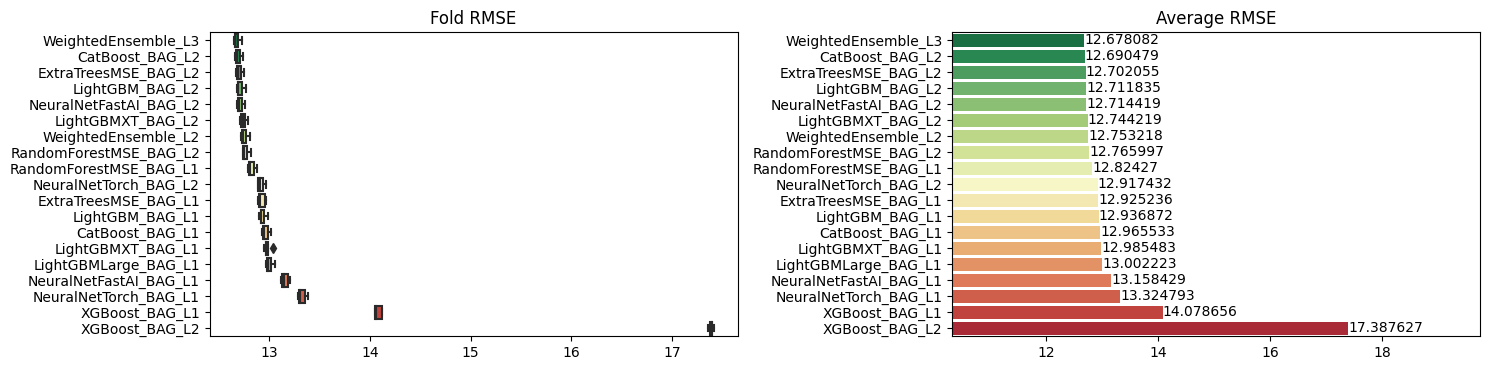

In [15]:
scores = pd.DataFrame(scores)
mean_scores = scores.mean().sort_values(ascending=True)
order = scores.mean().sort_values(ascending=True).index.tolist()

min_score = mean_scores.min()
max_score = mean_scores.max()
padding = (max_score - min_score) * 0.5
lower_limit = min_score - padding
upper_limit = max_score + padding

fig, axs = plt.subplots(1, 2, figsize=(15, scores.shape[1] * 0.2))

sns.boxplot(data=scores, order=order, ax=axs[0], orient="h", palette="RdYlGn_r")
axs[0].set_title("Fold RMSE")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

barplot = sns.barplot(x=mean_scores.values, y=mean_scores.index, ax=axs[1], palette="RdYlGn_r")
axs[1].set_title("Average RMSE")
axs[1].set_xlabel("")
axs[1].set_xlim(left=lower_limit, right=upper_limit)
axs[1].set_ylabel("")

for i, score in enumerate(mean_scores.values):
    barplot.text(score, i, round(score, 6), va="center")

plt.tight_layout()
plt.show()